In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/kaggle/input/database-company/companies_sorted.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Unnamed: 0                 int64  
 1   name                       object 
 2   domain                     object 
 3   year founded               float64
 4   industry                   object 
 5   size range                 object 
 6   locality                   object 
 7   country                    object 
 8   linkedin url               object 
 9   current employee estimate  int64  
 10  total employee estimate    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 602.0+ MB
None


In [5]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

In [6]:
df = df.drop('unnamed:_0', axis=1)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 10 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   name                       object 
 1   domain                     object 
 2   year_founded               float64
 3   industry                   object 
 4   size_range                 object 
 5   locality                   object 
 6   country                    object 
 7   linkedin_url               object 
 8   current_employee_estimate  int64  
 9   total_employee_estimate    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 547.3+ MB
None


In [8]:
required_columns = [
    "name", 
    "domain", 
    "year_founded",
    "industry",
    "size_range",  
    "locality", 
    "country",
    "linkedin_url",
    "current_employee_estimate",
    "total_employee_estimate"
]

In [9]:
df_clean = df.dropna(subset=required_columns)
df_clean.reset_index(drop=True, inplace=True)

In [10]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535176 entries, 0 to 2535175
Data columns (total 10 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   name                       object 
 1   domain                     object 
 2   year_founded               float64
 3   industry                   object 
 4   size_range                 object 
 5   locality                   object 
 6   country                    object 
 7   linkedin_url               object 
 8   current_employee_estimate  int64  
 9   total_employee_estimate    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 193.4+ MB
None


In [11]:
df_clean = df_clean[df_clean["current_employee_estimate"].astype(str).str.isnumeric()]
df_clean["current_employee_estimate"] = df_clean["current_employee_estimate"].astype(int)

In [12]:
df_clean = df_clean[df_clean["total_employee_estimate"].astype(str).str.isnumeric()]
df_clean["total_employee_estimate"] = df_clean["total_employee_estimate"].astype(int)

In [13]:
df_clean["company_age"] = 2025 - df_clean["year_founded"]

In [64]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 0 to 1862
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       1257 non-null   object 
 1   domain                     1257 non-null   object 
 2   year_founded               1257 non-null   float64
 3   industry                   1257 non-null   object 
 4   size_range                 1257 non-null   object 
 5   locality                   1257 non-null   object 
 6   country                    1257 non-null   object 
 7   linkedin_url               1257 non-null   object 
 8   current_employee_estimate  1257 non-null   int64  
 9   total_employee_estimate    1257 non-null   int64  
 10  company_age                1257 non-null   float64
 11  size_bucket                1257 non-null   int64  
 12  industry_label             1257 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 137.

In [65]:
valid_sizes = set([
    "1-10", "11-50", "51-200", "201-500",
    "501-1000", "1001-5000", "5001-10000", "10001+"
])

df_clean = df_clean[df_clean["size_range"].isin(valid_sizes)]

size_mapping = {
    "1-10": 1,
    "11-50": 2,
    "51-200": 3,
    "201-500": 4,
    "501-1000": 5,
    "1001-5000": 6,
    "5001-10000": 7,
    "10001+": 8
}
df_clean["size_bucket"] = df_clean["size_range"].map(size_mapping)

In [67]:
industry_priority = [
    "computer software", "information technology and services", "internet", 
    "computer hardware", "telecommunications", "consumer electronics", 
    "electrical/electronic manufacturing", "semiconductors", 
    "staffing and recruiting", "financial services", "consulting", "design",
    "education management", "higher education", "research", "entertainment", 
    "marketing and advertising", "human resources", "banking", "insurance", 
    "medical devices", "health, wellness and fitness", "hospital & health care", 
    "pharmaceuticals", "biotechnology", "government administration", 
    "non-profit organization management", "utilities", "construction", 
    "civil engineering", "mechanical or industrial engineering", "automotive", 
    "transportation/trucking/railroad", "logistics and supply chain", 
    "airlines/aviation", "aviation & aerospace", "defense & space", "machinery", 
    "mining & metals", "oil & energy", "real estate", "accounting", "chemicals", 
    "consumer goods", "apparel & fashion", "luxury goods & jewelry", 
    "food & beverages", "food production", "restaurants", "retail", 
    "security and investigations", "leisure, travel & tourism", "hospitality", 
    "outsourcing/offshoring", "international affairs", "broadcast media", 
    "cosmetics", "renewables & environment"
]

In [68]:
industry_label_map = {name: idx + 1 for idx, name in enumerate(industry_priority)}

In [69]:
df_clean["industry_label"] = df_clean["industry"].map(industry_label_map)

In [70]:
df_clean = df_clean[df_clean["industry_label"].notnull()]
df_clean["industry_label"] = df_clean["industry_label"].astype(int)

In [71]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 0 to 1862
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       1257 non-null   object 
 1   domain                     1257 non-null   object 
 2   year_founded               1257 non-null   float64
 3   industry                   1257 non-null   object 
 4   size_range                 1257 non-null   object 
 5   locality                   1257 non-null   object 
 6   country                    1257 non-null   object 
 7   linkedin_url               1257 non-null   object 
 8   current_employee_estimate  1257 non-null   int64  
 9   total_employee_estimate    1257 non-null   int64  
 10  company_age                1257 non-null   float64
 11  size_bucket                1257 non-null   int64  
 12  industry_label             1257 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 137.

In [72]:
meta_data_df = df_clean[["name", "domain", "country", "industry"]].copy()

In [73]:
feature_df = df_clean[[
    "company_age",
    "size_bucket",
    "current_employee_estimate",
    "total_employee_estimate",
    "industry_label"
]].copy()

In [74]:
scaler_final = StandardScaler()
X_final_scaled = scaler_final.fit_transform(feature_df)

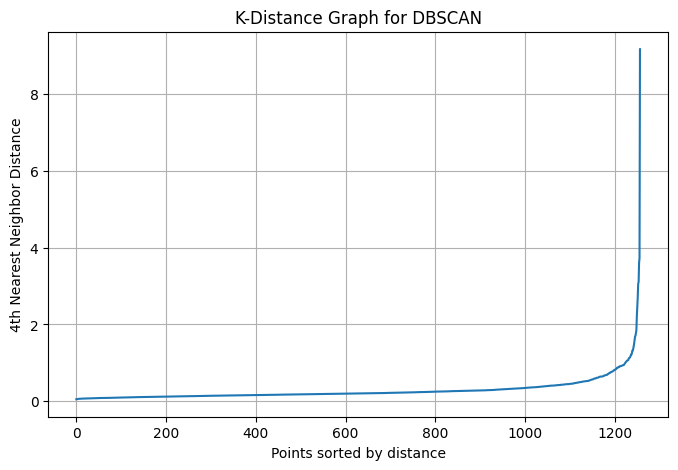

In [75]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_final_scaled)
distances, indices = neighbors_fit.kneighbors(X_final_scaled)

k_distances = np.sort(distances[:, 3])
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title("K-Distance Graph for DBSCAN")
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid(True)
plt.show()

In [76]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=1.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_final_scaled)

df_clean_clustered = df_clean.copy()
df_clean_clustered["cluster"] = dbscan_labels

In [77]:
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters found: 2
Number of noise points: 9


In [78]:
epsilon = 1e-8

# Normalize size
min_size = df_clean_clustered["size_bucket"].min()
max_size = df_clean_clustered["size_bucket"].max()
df_clean_clustered["norm_size"] = (
    df_clean_clustered["size_bucket"] - min_size
) / (max_size - min_size + epsilon)

In [79]:
# Normalize age (young = 1, old = 0)
min_age = df_clean_clustered["company_age"].min()
max_age = df_clean_clustered["company_age"].max()
df_clean_clustered["norm_age"] = (
    max_age - df_clean_clustered["company_age"]
) / (max_age - min_age + epsilon)

In [81]:
df_clean_clustered["size_boost"] = df_clean_clustered["norm_size"] ** 1.5
df_clean_clustered["age_boost"] = df_clean_clustered["norm_age"] ** 1.8

In [82]:
# Maturity bonus: old + very large companies
df_clean_clustered["maturity_bonus"] = np.where(
    (df_clean_clustered["company_age"] > 20) & (df_clean_clustered["size_bucket"] >= 7),
    1.0,
    0.0
)

In [83]:
# Growth bonus: current much lower than total estimate
df_clean_clustered["growth_bonus"] = np.where(
    df_clean_clustered["current_employee_estimate"] / (df_clean_clustered["total_employee_estimate"] + 1e-8) < 0.7,
    1.0,
    0.0
)

In [84]:
# Calculate lead score (raw form)
df_clean_clustered["lead_score_raw"] = (
    0.5 * df_clean_clustered["size_boost"] +
    0.4 * df_clean_clustered["age_boost"] +
    0.05 * df_clean_clustered["maturity_bonus"] +
    0.05 * df_clean_clustered["growth_bonus"]
)

In [85]:
# Normalize to 0–100 scale
min_score = df_clean_clustered["lead_score_raw"].min()
max_score = df_clean_clustered["lead_score_raw"].max()
df_clean_clustered["lead_score"] = (
    (df_clean_clustered["lead_score_raw"] - min_score) /
    (max_score - min_score + 1e-8)
) * 100

In [86]:
print(df_clean_clustered[df_clean_clustered["lead_score"].isnull()])

Empty DataFrame
Columns: [name, domain, year_founded, industry, size_range, locality, country, linkedin_url, current_employee_estimate, total_employee_estimate, company_age, size_bucket, industry_label, cluster, norm_size, norm_age, size_boost, age_boost, maturity_bonus, growth_bonus, lead_score_raw, lead_score]
Index: []

[0 rows x 22 columns]


In [87]:
top_leads = df_clean_clustered.sort_values(by="lead_score", ascending=False)[
    ["name", "industry", "size_range", "company_age", "lead_score", "cluster"]
]
print("Top Leads:")
print(top_leads.head(10))

Top Leads:
                                    name                             industry  \
1746                              mobily                   telecommunications   
860                  crédit agricole cib                              banking   
1086               bayer materialscience                            chemicals   
744                             yes bank                              banking   
1039                         post office                               retail   
1129           niit technologies limited  information technology and services   
518                                infor                    computer software   
197   us department of homeland security            government administration   
996                           edf energy                            utilities   
1535                      vinci energies  information technology and services   

     size_range  company_age  lead_score  cluster  
1746     10001+         21.0   99.999998     

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


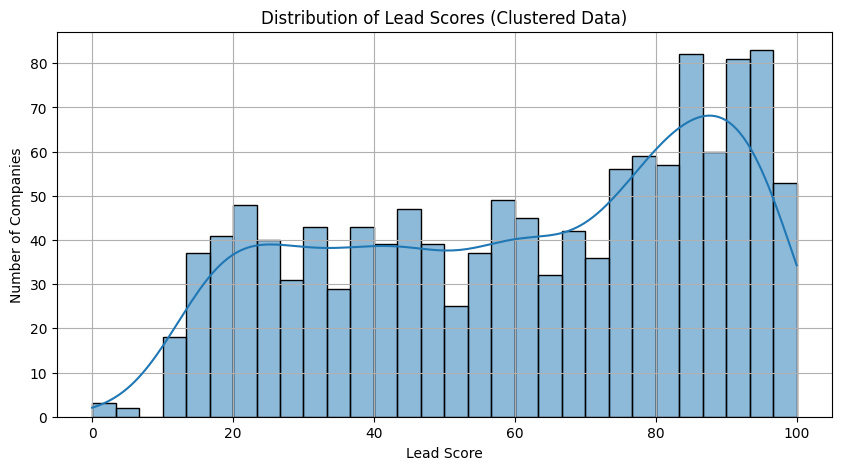

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_clean_clustered["lead_score"], bins=30, kde=True)
plt.title("Distribution of Lead Scores (Clustered Data)")
plt.xlabel("Lead Score")
plt.ylabel("Number of Companies")
plt.grid(True)
plt.show()